<a href="https://colab.research.google.com/github/JabborovRoboCoder/Clustering/blob/main/Amaliyot_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

**Amaliyot: Mijozlarni klasterlash**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/customer_segmentation.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [ ]:
df.isnull().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64

In [ ]:
df.drop('Address',axis=1,inplace=True)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
from sklearn.preprocessing import StandardScaler
x = df.values[:,1:]
x = np.nan_to_num(x)
norm_data = StandardScaler().fit_transform(x)
norm_data

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [ ]:
k = 3
k_means = KMeans(n_clusters=k)
k_means.fit(norm_data)
print(k_means.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 0 2 1 0 0 1 1 1 0 2 1 1 1 2 1 1 1 0 1 1 1 2 0 0 1 1 1 1 1 1 0 2 1 1 1 2
 2 1 0 2 0 1 0 1 0 1 1 1 1 0 0 2 1 2 2 2 1 1 1 0 1 0 0 1 1 1 2 1 2 1 1 1 1
 1 1 1 1 0 1 1 2 0 1 0 1 1 1 2 2 1 1 2 2 1 1 1 1 2 1 2 0 1 2 2 0 1 1 1 1 1
 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 0 1 1 2
 1 1 1 0 2 1 1 1 1 0 2 2 1 0 1 1 1 1 1 1 1 1 0 1 1 2 1 2 1 1 2 0 2 1 1 0 2
 0 1 1 1 1 1 0 1 2 1 1 1 0 0 1 0 1 2 1 1 2 1 0 1 2 1 1 1 1 1 2 2 0 1 1 2 0
 1 1 1 1 0 1 1 2 1 1 1 1 0 1 1 2 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 2 1 2 1
 1 1 0 1 2 0 2 1 0 1 1 2 1 1 1 1 2 2 2 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 2 1 1
 2 1 2 0 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 2 1 2 0 1 2 1 1 1 2 2 1 1 1 0 2
 1 1 2 1 0 1 1 1 1 1 2 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 2 1 2 1 1 1 0 0 1
 2 1 0 2 2 1 1 1 2 1 1 1 1 1 0 1 0 1 1 1 1 2 1 2 1 1 1 0 1 1 1 1 2 1 1 2 2
 0 1 1 1 1 1 2 2 1 0 2 0 1 1 2 1 1 0 0 1 2 1 1 0 1 2 1 0 1 1 1 0 1 1 1 1 0
 1 2 1 1 1 1 0 2 1 1 0 1 2 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 2 1 1 1 2 1
 2 1 1 1 1 1 0 2 2 1 0 1 

In [ ]:
df['cluster']=k_means.labels_
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [ ]:
df.groupby('cluster').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,,
0,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
1,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
2,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578


Har bir klasterdagi mijozlar haqida qanday xulosa qilish mumkin?

Masalan, yoshiga (Age) qaraydigan bo'lsak 0-klaster katta yoshlar (43+), 1-klaster o'rta yosh (33+), 2-klaster yoshlar (31 gacha).

Har bir klasterni yaqqol ajratib turuvchi ustunlar bu Income (daromad) va Year Employed (necha yildan beri ishlashi) ekan.

Demak biz har klasterni quyidagicha ta'riflashimiz mumkin:

0-klaster - Katta yosh, uzoq tajribaga ega, katta daromad qiluvchi mijozlar.
1-klaster - Yosh, kam tajriba va kam daromad mijozlar.
2-klaster - O'rta yosh, 7+ yil tarjibaga ega, kam daromad mijozlar.

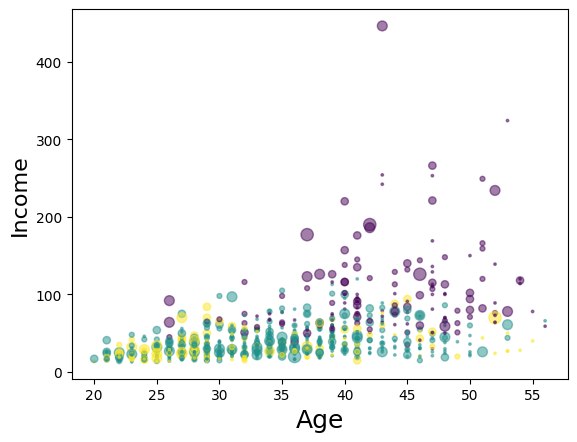

In [ ]:
area = np.pi * ( x[:, 1])**2
plt.scatter(x[:, 0], x[:, 3], s=area, c=k_means.labels_.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()